In [13]:
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [14]:
ke = 0.00175  # 0.025
temp_env = 22
temp_initial = 83
time_step = 0.5
time_max = 500
euler_step = 0.001

In [15]:
def f(temp):
    return -ke * (temp - temp_env)

In [16]:
def forward_euler(h, x, x_t, y):
    while x < x_t:
        y += h * f(y)
        x += h
    return x, y


def backward_euler(h, y):
    return fsolve(lambda y_next: y_next - h * f(y_next) - y, y)


def trapezoidal(h, y):
    return fsolve(lambda y_next: y_next - h * (f(y) + f(y_next)) / 2 - y, y)

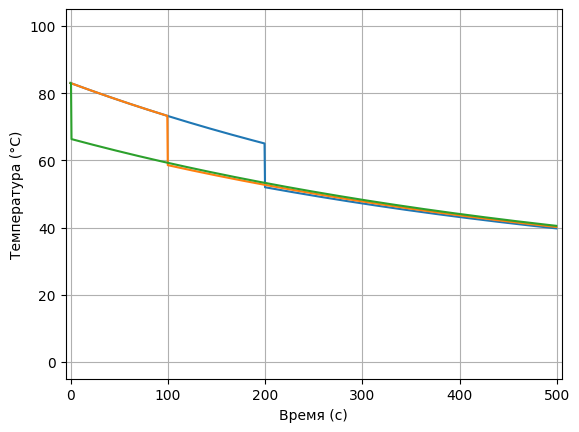

In [17]:
milk_time = [1, 100, 200]
milk_temp = 0
milk_mass = 50
coffee_mass = 200

for mt in milk_time[-1::-1]:
    time = [i * time_step for i in range(int(time_max / time_step))]
    temp = [temp_initial]

    for i in range(len(time) - 1):
        if time[i] == mt:  # добавили молоко
            temp[i] = (temp[i] * coffee_mass + milk_temp * milk_mass) / (milk_mass + coffee_mass)
        temp.append(forward_euler(euler_step, time[i], time[i + 1], temp[i])[1])
    
    plt.plot(time, temp)

plt.xlabel('Время (с)')
plt.ylabel('Температура (°C)')
plt.xlim(-5, time_max + 5)
plt.ylim(-5, 105)
plt.grid()
plt.show()

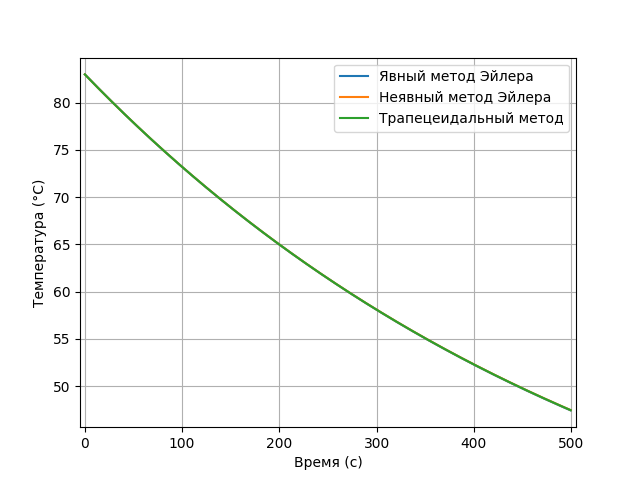

In [18]:
%matplotlib widget

time = [i * time_step for i in range(int(time_max / time_step))]
temp1 = [temp_initial]
temp2 = [temp_initial]
temp3 = [temp_initial]

for i in range(len(time) - 1):
    temp1.append(forward_euler(euler_step, time[i], time[i + 1], temp1[i])[1])
    temp2.append(backward_euler(time_step, temp2[i])[0])
    temp3.append(trapezoidal(time_step, temp3[i])[0])

plt.plot(time, temp1, label='Явный метод Эйлера')
plt.plot(time, temp2, label='Неявный метод Эйлера')
plt.plot(time, temp3, label='Трапецеидальный метод')
plt.xlabel('Время (с)')
plt.ylabel('Температура (°C)')
plt.xlim(-5, time_max + 5)
plt.autoscale(axis='y')
plt.grid()
plt.legend()
plt.show()